### pandas를 이용한 시각화

- amtplotlib을 이용한 시각화 : 여러 옵션들을 설정해서 직접 그려볼 수 있다. 커스터마이징에 용이
- pandas, seaborn을 이용한 시각화 : 손쉽게 차트를 만들 수 있다.

In [5]:
import pandas as pd

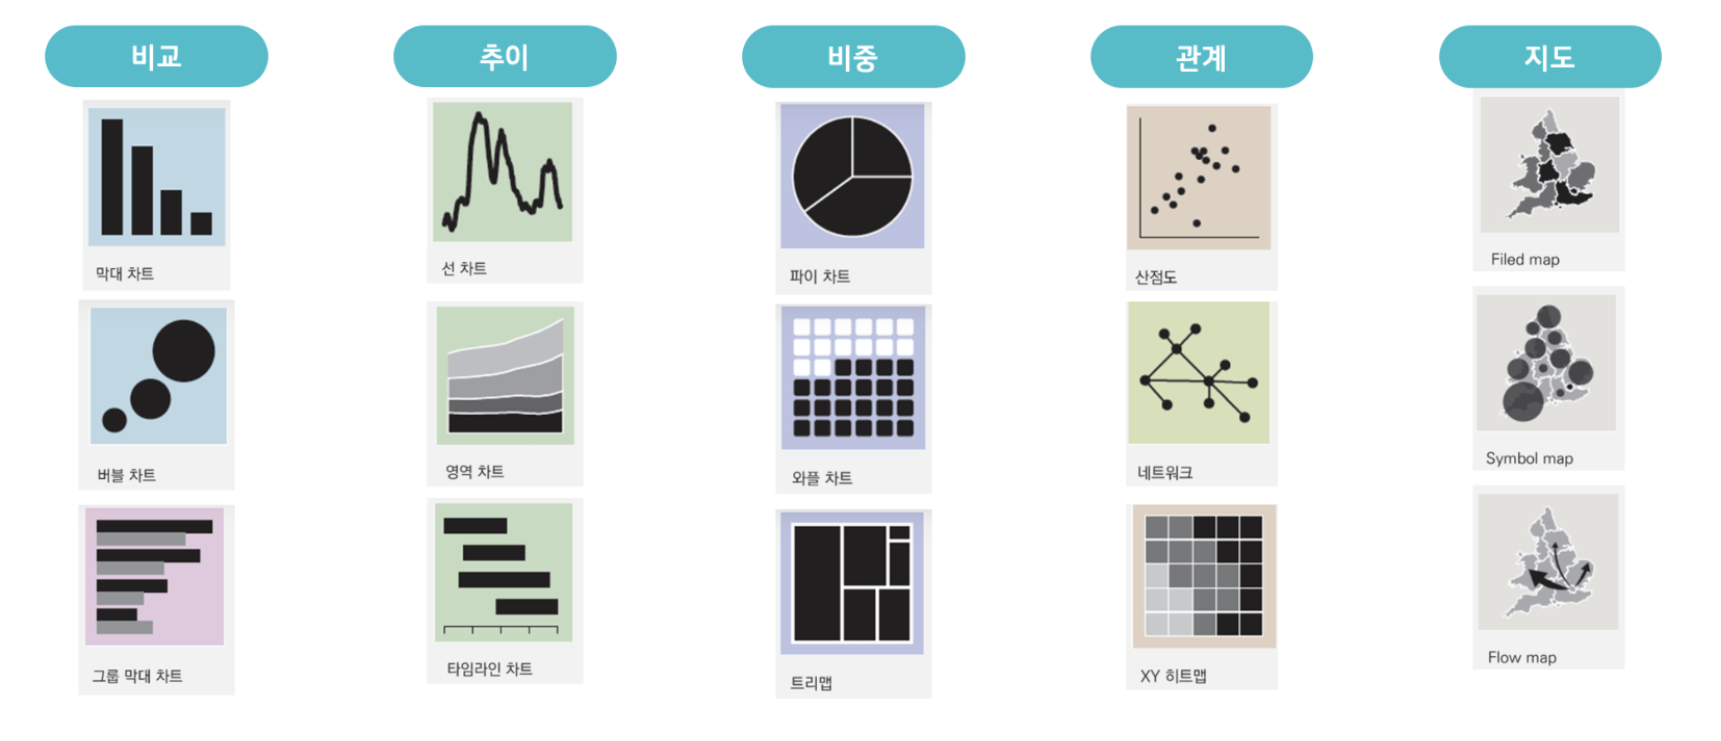

### 1. line chart
연도별 입사자 추세 확인


In [17]:
# hr 데이터 가져오기
#  parse_dates : 날짜타입으로 변환할 데이터 설정...
hr_info = pd.read_csv('data/hr-info.csv',encoding = 'euc-kr', parse_dates=['HIRE_DATE'])
hr_info

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.00,4500,NaN,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
196,E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.00,4500,NaN,4,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N
197,E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.00,4500,NaN,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
198,E00304,탐출조,M,ORG009,P009,24,0,학사 학위,0.00,4500,NaN,4,Salesforce,Y,2024-09-01,NaN,NaN,NaN,KOREA,N


In [21]:
# 입사연도 추출
hr_info['HIRE_DATE'].dt.year

0      1999
1      2000
2      2002
3      2006
4      2005
       ... 
195    2024
196    2024
197    2024
198    2024
199    2024
Name: HIRE_DATE, Length: 200, dtype: int32

In [23]:
# 입사년도 컬럼 추가
hr_info['HIRE_YEAR'] = hr_info['HIRE_DATE'].dt.year

In [25]:
hr_info.head()

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,...,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION,HIRE_YEAR
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,...,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y,1999
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,...,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y,2000
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,...,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y,2002
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,...,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y,2006
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,...,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y,2005


In [29]:
# 연도별 입사자 수 파악
hr_info['HIRE_YEAR'].value_counts().sort_index()

HIRE_YEAR
1999     1
2000     1
2002     1
2004     4
2005     4
2006     4
2010     7
2011     7
2012     8
2015    12
2016    12
2017    12
2022    25
2023    29
2024    73
Name: count, dtype: int64

<Axes: xlabel='HIRE_DATE', ylabel='HIRE_COUNT'>

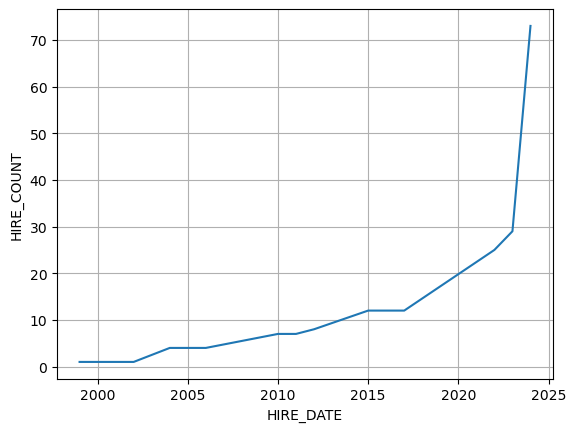

In [31]:
# 연도별 입사자 수 선그래프로 파악하기
hr_info['HIRE_YEAR'].value_counts().sort_index().plot(kind = 'line',
                                                      xlabel = 'HIRE_DATE',
                                                      ylabel = 'HIRE_COUNT',
                                                      grid = True
                                                     )

### 2. Bar chart

In [34]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

In [41]:
hr_info.head(3)

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,...,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION,HIRE_YEAR
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.5,10200,...,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y,1999
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.6,9500,...,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y,2000
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.6,9100,...,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y,2002


### 학위별 평균 연봉 비교

In [53]:
hr_info[['SALARY','EDU_LEVEL']].groupby(['EDU_LEVEL']).mean()

,SALARY
EDU_LEVEL,
고등학교 졸업,6140.000000
박사 학위,8166.666667
석사 학위,6900.000000
전문대 학위,5050.000000
학사 학위,5727.044025


<Axes: xlabel='EDU_LEVEL'>

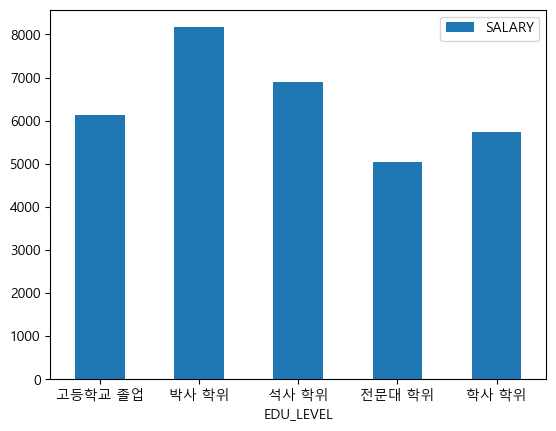

In [63]:
# 데이터 집계 및 시각화
hr_info[['SALARY','EDU_LEVEL']].groupby(['EDU_LEVEL']).mean().plot(kind = 'bar', rot = 0)

### 학위, 성별에 따른 평균연봉 시각화

<Axes: xlabel='EDU_LEVEL,GENDER'>

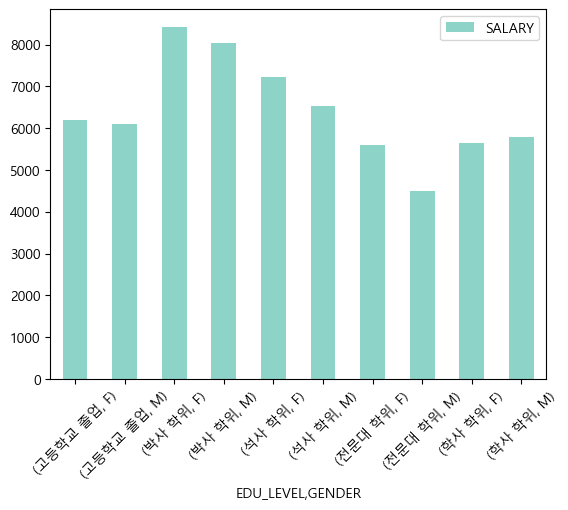

In [82]:
hr_info[['EDU_LEVEL','GENDER','SALARY']].groupby(['EDU_LEVEL','GENDER']).mean().plot(kind = 'bar', rot = 45,
                                                                                    colormap = 'Set3')

### 재구조화

In [91]:
hr_salary_mean = hr_info[['EDU_LEVEL','GENDER','SALARY']].groupby(['EDU_LEVEL','GENDER']).mean().round(1)
hr_salary_mean

SALARY
EDU_LEVEL GENDER        
고등학교 졸업   F       6200.0
          M       6100.0
박사 학위     F       8425.0
          M       8037.5
석사 학위     F       7233.3
          M       6525.0
전문대 학위    F       5600.0
          M       4500.0
학사 학위     F       5643.1
          M       5785.1

In [93]:
# 인덱스를 숫자로 리셋
hr_salary_mean.reset_index()

,EDU_LEVEL,GENDER,SALARY
0,고등학교 졸업,F,6200.0
1,고등학교 졸업,M,6100.0
2,박사 학위,F,8425.0
3,박사 학위,M,8037.5
4,석사 학위,F,7233.3
5,석사 학위,M,6525.0
6,전문대 학위,F,5600.0
7,전문대 학위,M,4500.0
8,학사 학위,F,5643.1
9,학사 학위,M,5785.1


In [95]:
# 데이터 재구조화
hr_salary_mean2 = hr_salary_mean.reset_index().pivot(index = 'EDU_LEVEL',columns = 'GENDER', values = 'SALARY')
hr_salary_mean2

GENDER,F,M
EDU_LEVEL,,
고등학교 졸업,6200.0,6100.0
박사 학위,8425.0,8037.5
석사 학위,7233.3,6525.0
전문대 학위,5600.0,4500.0
학사 학위,5643.1,5785.1


<Axes: title={'center': '교육수준과 성별에 따른 평균연봉 비교'}, xlabel='평균연봉', ylabel='교육수준'>

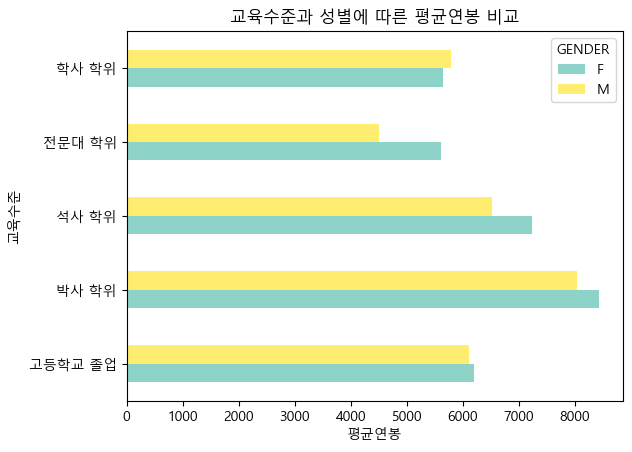

In [97]:
# 시각화
# barh : 막대그래프(수평)
hr_salary_mean2.plot(kind = 'barh', colormap = 'Set3', xlabel ='평균연봉', ylabel = '교육수준', title = '교육수준과 성별에 따른 평균연봉 비교')

array([<Axes: title={'center': 'F'}, xlabel='평균연봉', ylabel='교육수준'>,
       <Axes: title={'center': 'M'}, xlabel='평균연봉', ylabel='교육수준'>],
      dtype=object)

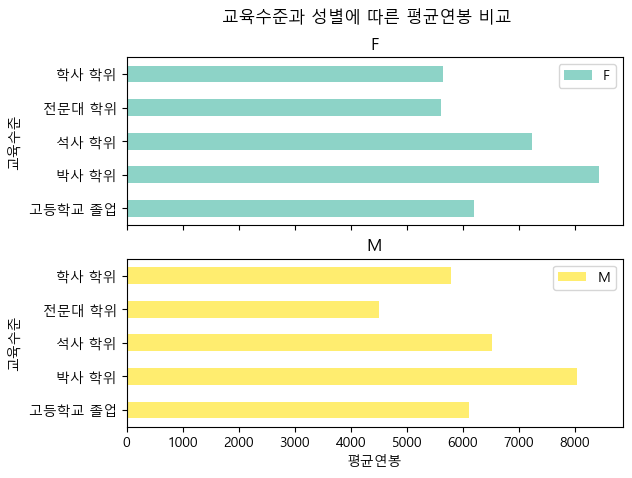

In [101]:
hr_salary_mean2.plot(kind = 'barh', colormap = 'Set3', xlabel ='평균연봉', ylabel = '교육수준', title = '교육수준과 성별에 따른 평균연봉 비교', subplots = True)

### 팀별 평균 연봉 비교하기

In [106]:
# 조직정보 불러오기
org_info = pd.read_csv('data/org-info.csv',encoding = 'euc-kr')
org_info.head()

,ORG_CD,ENG_DIVISION,KOR_DIVISION,ENG_DEPARTMENT,KOR_DEPARTMENT,Team,KOR_TEAM,Role
0,ORG001,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Product Management Team,TV 제품 관리 팀,관리 및 마케팅 전략 수립을 통해 TV 제품의 전체 라이프사이클을 관리합니다.
1,ORG002,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Marketing Team,TV 마케팅 팀,"TV 제품의 시장 진입 전략을 수립하고, 광고 및 프로모션 활동을 기획합니다."
2,ORG003,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Customer Support Team,TV 고객 지원 팀,TV 고객 지원 서비스 제공 및 고객 만족도를 높이기 위한 해결책을 제공합니다.
3,ORG004,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS Core Development Team,webOS 핵심 개발 팀,webOS 플랫폼의 핵심 기능 개발 및 유지보수를 담당합니다.
4,ORG005,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS User Interface Team,webOS 사용자 인터페이스 팀,webOS의 사용자 인터페이스 디자인 및 개선을 담당합니다.


In [ ]:
# 조직정보 데이터와 인사정보를 merge
# 팀별 평균 연봉을 구하는 목적 = 팀 정보는 조직df, 연봉정보 = 인사df
# 공통 ORG_CD(조직번호)를 중심으로 진행

In [120]:
org_hr_merge = pd.merge(hr_info, org_info, on = 'ORG_CD')
org_hr_merge.shape # CED, 사장, 부사장은 조직 정보가 없음

(197, 28)

In [126]:
org_hr_merge['KOR_TEAM'].value_counts()

KOR_TEAM
북미 판매 팀              12
첨단 제조 팀              12
webOS 핵심 개발 팀        11
정보관리팀                10
인도 시장 분석 팀           10
혁신 연구 팀              10
인도 B2B 판매 팀           8
인재 채용 팀               8
주방 가전 개발 팀            8
webOS 사용자 인터페이스 팀     8
주방 제품 마케팅 팀           8
보상 및 복리후생 팀           7
글로벌 판매 전략 팀           7
webOS 품질 보증 팀         6
TV 제품 관리 팀            6
인도 고객 지원 팀            6
프로젝트 관리 팀             5
기술 영업 지원 팀            5
직원 개발 팀               5
생산 품질 관리 팀            5
TV 고객 지원 팀            5
주요 고객 관리 팀            5
고객 통찰 팀               5
생산 공정 개선 팀            4
부품개발팀                 4
분석팀                   4
TV 마케팅 팀              4
아시아 지역 판매 팀           3
신사업 개발 팀              3
주방 고객 서비스 팀           3
Name: count, dtype: int64

<Axes: xlabel='KOR_TEAM', ylabel='연봉'>

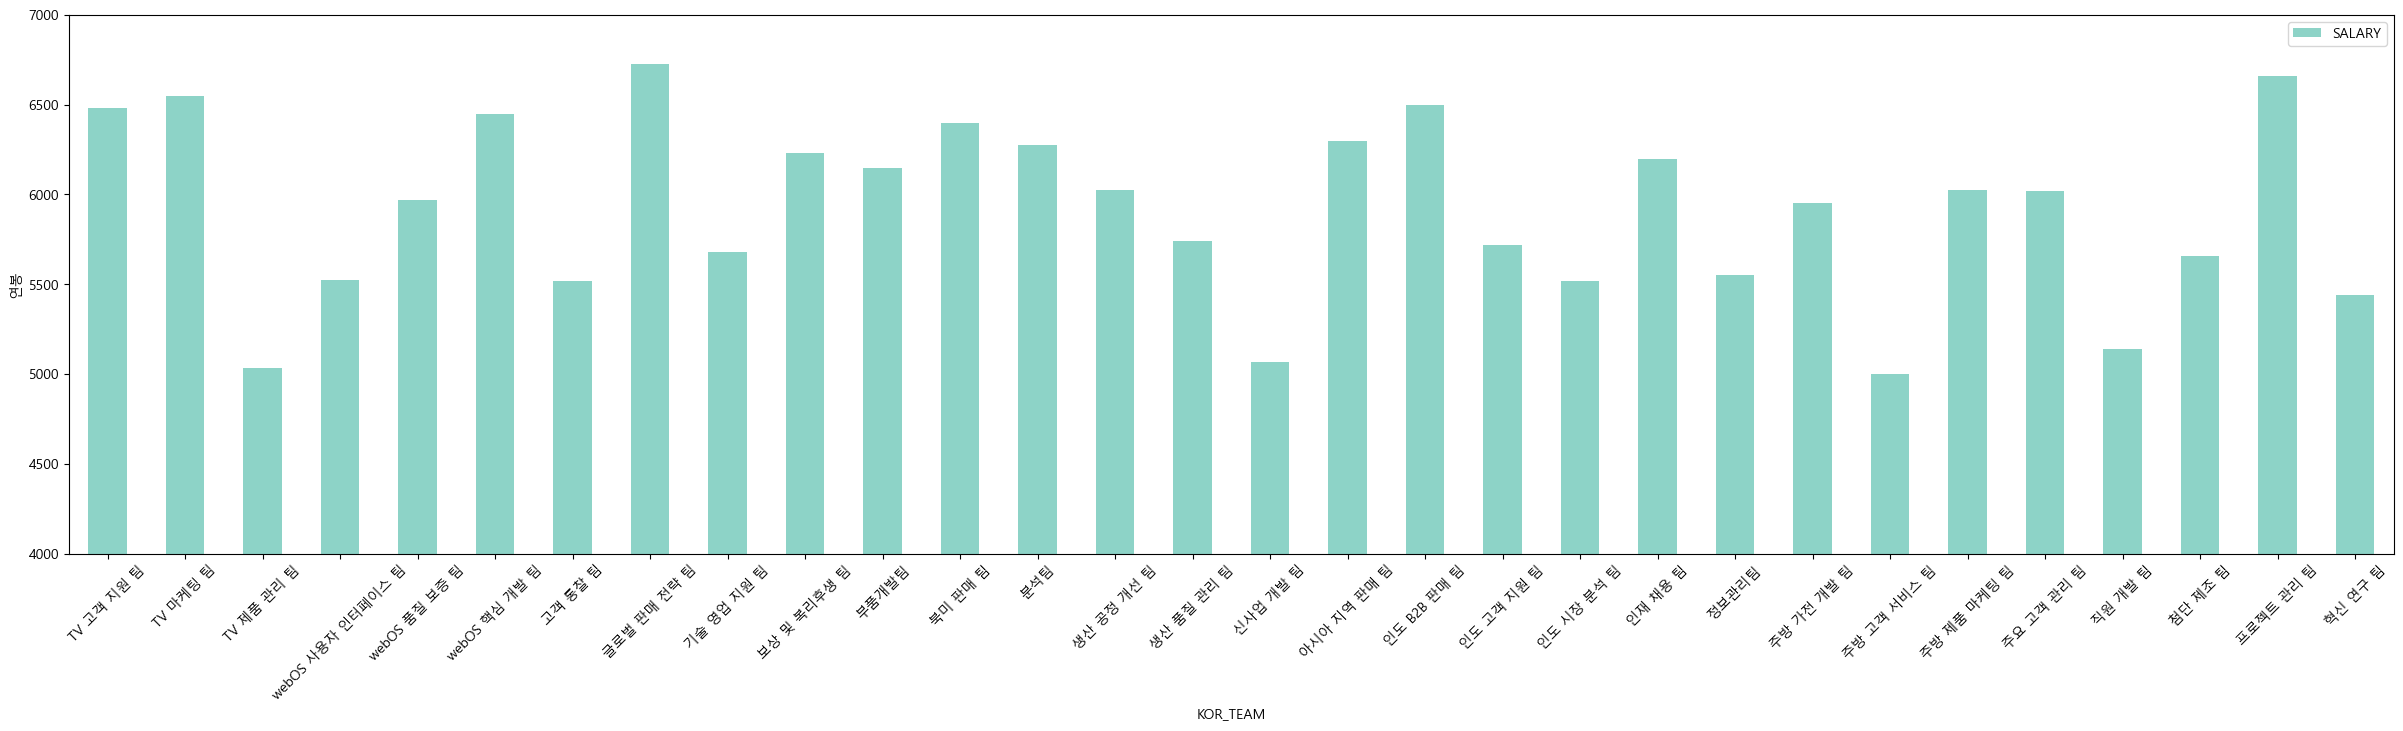

In [176]:
# 팀별 평균 연봉 구하기 (KOR_TEAM별)
# 막대 그래프로 시각화
org_hr_merge[['KOR_TEAM','SALARY']].groupby('KOR_TEAM').mean().plot(kind = 'bar',
                                                                   ylabel = '연봉',
                                                                    colormap = 'Set3',
                                                                    figsize =(30,7),
                                                                    rot = 45,
                                                                    ylim =(4000,7000)
                                                                   )

### 3. pie chart
values
- 원 그래프에 들어갈 데이터

labels
- 원 그래프 바깥에 표시되는 데이터의 이름

autopct
- 소수점 자리표시 설정
- %.1f%% : 소수점 첫째자릮지 표시하고 뒤에 % 표시

startangle
- 원 그래프에서 첫 데이터 시작위치를 설정
- 90 : 원 그래프의 첫 데이터 시작을 12시 기준으로 한다.

counterclock
- False : 원 그래프 출력을 시계방향으로
- True : 원 그래프 출력을 반시계방향으로


각 부서별 인원수 확인

In [181]:
org_hr_merge['KOR_DIVISION'].value_counts()

KOR_DIVISION
HE사업본부    58
BS사업본부    49
VS사업본부    30
생산기술원     21
HR        20
HA사업본부    19
Name: count, dtype: int64

<Axes: title={'center': '각 본부의 인원비율'}>

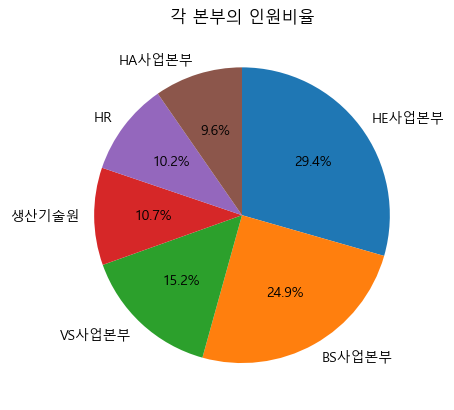

In [187]:
org_hr_merge['KOR_DIVISION'].value_counts().plot(kind = 'pie',
                                                startangle = 90,
                                                counterclock = False,
                                                autopct = '%.1f%%',
                                                ylabel = '',
                                                title = '각 본부의 인원비율')

### 4. scatter(산점도)

나이에 따른 연봉 변화

<Axes: xlabel='AGE', ylabel='SALARY'>

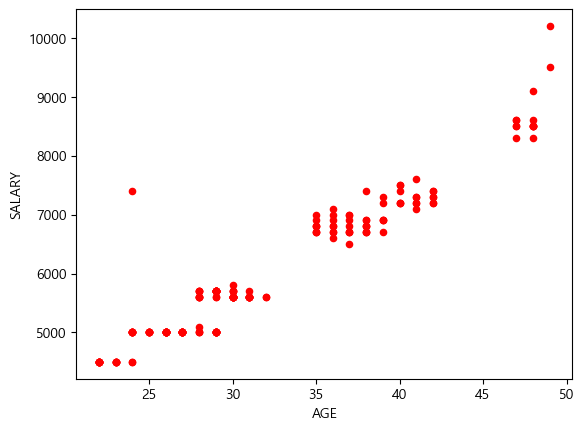

In [197]:
hr_info.plot(kind = 'scatter', x='AGE', y='SALARY', color='red')

### Seaborn 패키지를 이용한 차트
- matplotlib을 기반으로한 데이터 시각화 도구
- 다양한 형태의 그래프를 손쉽게 활용가능
- 사용하기 편함

### 1. 히스토그램


성별에 따른 현봉 히스토그램

In [203]:
import seaborn as sns

<Axes: xlabel='SALARY', ylabel='Count'>

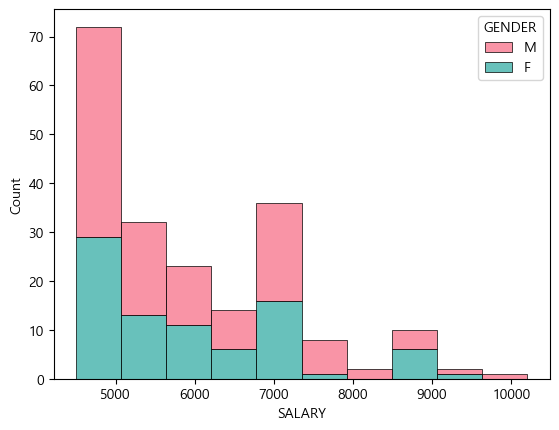

In [211]:
sns.histplot(  # Seaborn의 히스토그램 생성 함수
    hr_info, # 사용할 데이터
    x = 'SALARY',
    hue = 'GENDER', # 분류 기준
    multiple = 'stack', # 막대를 쌓아서 그룹별 분포 표시
    palette = 'husl', # 색테마. pastel,husl,Set3,muted,coolwarm 등등.
    linewidth = 0.5 # 막대 테두리 두깨
    )

### 2. 버블차트

나이와 근속연수에 따른 부서별 연봉

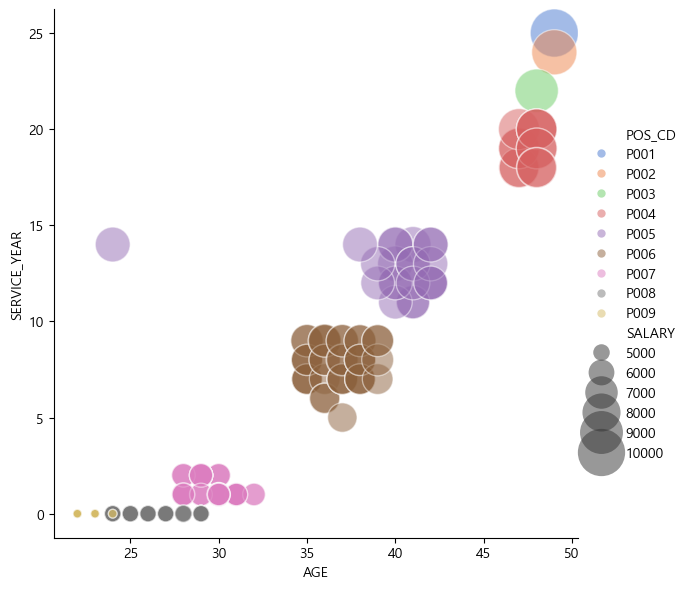

In [224]:
sns.relplot(
    data = hr_info,
    x='AGE',
    y='SERVICE_YEAR',
    hue='POS_CD', # 구분 기준은 직위 코드
    size='SALARY', # 버블 크기를 기준으로 
    sizes=(40,1200), # 차트 사이즈
    alpha=0.5, # 투명도
    palette='muted',
    height=6
)

### 3. 히트맵


In [233]:
hr_corr = hr_info[['PERFORMANCE_SCORE','SALARY','AGE','SERVICE_YEAR','TRAINING_HOURS']].corr()
hr_corr

,PERFORMANCE_SCORE,SALARY,AGE,SERVICE_YEAR,TRAINING_HOURS
PERFORMANCE_SCORE,1.000000,0.609152,0.582203,0.492801,0.551200
SALARY,0.609152,1.000000,0.961699,0.970875,0.628931
AGE,0.582203,0.961699,1.000000,0.932563,0.575867
SERVICE_YEAR,0.492801,0.970875,0.932563,1.000000,0.559911
TRAINING_HOURS,0.551200,0.628931,0.575867,0.559911,1.000000


In [227]:
hr_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   EID                 200 non-null    object        
 1   ENAME               200 non-null    object        
 2   GENDER              200 non-null    object        
 3   ORG_CD              197 non-null    object        
 4   POS_CD              200 non-null    object        
 5   AGE                 200 non-null    int64         
 6   SERVICE_YEAR        200 non-null    int64         
 7   EDU_LEVEL           200 non-null    object        
 8   PERFORMANCE_SCORE   200 non-null    float64       
 9   SALARY              200 non-null    int64         
 10  LAST_PROMO_DT       182 non-null    object        
 11  TRAINING_HOURS      200 non-null    int64         
 12  SKILLS              200 non-null    object        
 13  ACTIVE_STATE        200 non-null    object        

<Axes: >

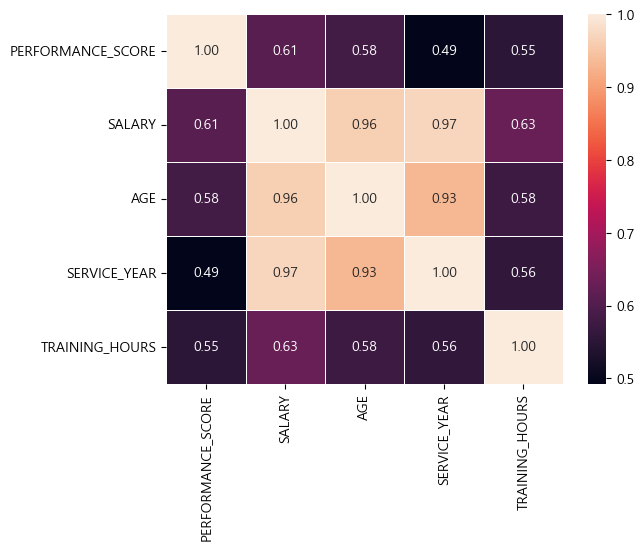

In [237]:
sns.heatmap(hr_corr, annot = True, fmt='.2f', linewidths=0.5)